In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import glob
import zipfile
import numpy as np
import statsmodels.api as sm
from collections import defaultdict, Counter
import networkx as nx

In [89]:
import pandas as pd

taobao = pd.read_csv('/Users/jessicawong/Desktop/1617autumn/computercommunication/BrowsePurchase/1Userbrowsetime.csv',
                     names = ['time', 'user', 'item'])

In [91]:
# with open ('/Users/jessicawong/Desktop/1617autumn/computercommunication/BrowsePurchase/1Userbrowsetime.csv', 'rb') as f:
#     taobao=f.readlines()

In [145]:
taobao['minute'] = [int(i) for i in (taobao.time/60)]

In [152]:
taobao[:3]

,time,user,item,minute
0,0,71817,50385,0
1,0,131325,427241,0
2,0,138572,14017,0


# Flow Network

In [159]:
taobao = taobao.sort_values(by = ['user', 'time'], ascending=[1, 1])

In [161]:
taobao[:10]

,time,user,item,minute
8995662,13547,0,93,225
9079510,13649,0,29,227
9081466,13652,0,68,227
9081958,13652,0,82,227
9082339,13653,0,29,227
9082699,13653,0,86,227
10498364,15721,0,101,262
10501649,15724,0,94,262
10503340,15725,0,75,262
10503708,15725,0,70,262


In [169]:
len(taobao)

32373278

In [185]:
C = np.array(taobao[['user', 'item']])

In [177]:
 def constructFlowNetwork (C):
    '''
    C is an array of two dimentions
    '''
    E=defaultdict(lambda:0)
    E[('source',C[0][1])]+=1
    E[(C[-1][1],'sink')]+=1
    F=zip(C[:-1],C[1:])
    for i in F:
        if i[0][0]==i[1][0]:
            E[(i[0][1],i[1][1])]+=1
        else:
            E[(i[0][1],'sink')]+=1
            E[('source',i[1][1])]+=1
    G=nx.DiGraph()
    for i,j in E.items():
        x,y=i
        G.add_edge(x,y,weight=j)
    return G

def flowBalancing(G):
    H = G.copy()
    O = G.out_degree(weight='weight')
    I = G.reverse().out_degree(weight='weight')
    for i in O:
        if i =='sink' or i=='source':
            continue
        de = I[i]-O[i]
        if de > 0:
            H.add_edge(i,'sink',weight=de)
        else:
            H.add_edge('source',i,weight=-de)
    return H


def networkDissipate(G):
    D=defaultdict(lambda:[0,0,0])#toSink,totalflow,fromSource
    for x,y in G.edges():
        w = G[x][y].values()[0]
        D[x][1]+=w
        if y == 'sink':
            D[x][0]+=w
        if x == 'source':
            D[y][2]+=w
    return D

In [ ]:
g = constructFlowNetwork(C)

In [172]:
h = flowBalancing(g)

In [179]:
di = networkDissipate(h)

In [183]:
toSink,totalflow,fromSource = np.array(di.values()).T

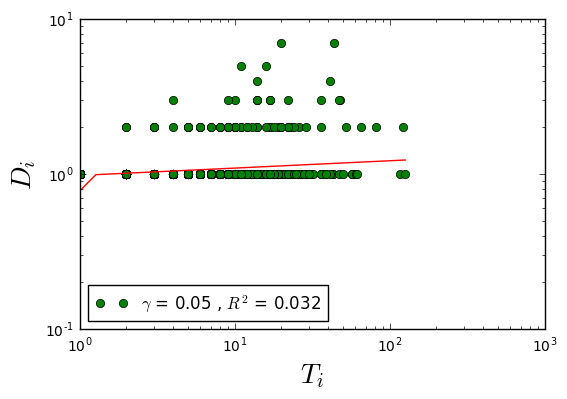

In [184]:
alloRegressPlot(totalflow,toSink,'g','o','$T_i$','$D_i$', True)

# Allowmetric Growth

In [147]:
taobao_groupby = taobao.groupby('minute')
uv = taobao_groupby['user'].nunique()
pv = taobao_groupby['item'].count()

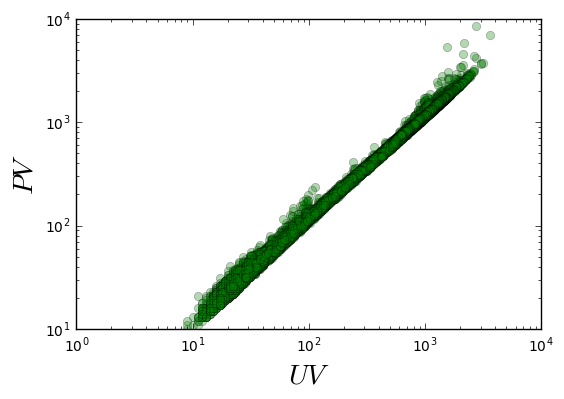

In [125]:
plt.plot(uv, pv, 'go', alpha = 0.3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$UV$', fontsize = 20)
plt.ylabel('$PV$', fontsize = 20)

plt.show()

In [139]:
def alloRegressPlot(xdata,ydata,col,mark,xlab,ylab, loglog):
    x=np.log(xdata+1);y=np.log(ydata+1);
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant=res.params[0];beta=res.params[1]; r2=res.rsquared
    plt.plot(xdata,ydata,mark,color=col, \
             label = '$\\gamma$ = '+ str(np.round(beta,2)) + ' , ' \
         + '$R^2$ = ' + str(np.round(r2,3)))
    if loglog == True:
        plt.xscale('log');plt.yscale('log')
    plt.xlabel(xlab, fontsize = 20);plt.ylabel(ylab, fontsize = 20)
    minx,maxx=plt.xlim(); miny,maxy=plt.ylim()
    plt.legend(loc = 0)
    xs = np.linspace(min(xdata),max(xdata),100)
    plt.plot(xs,np.exp(constant)*xs**beta,color='r',linestyle='-')

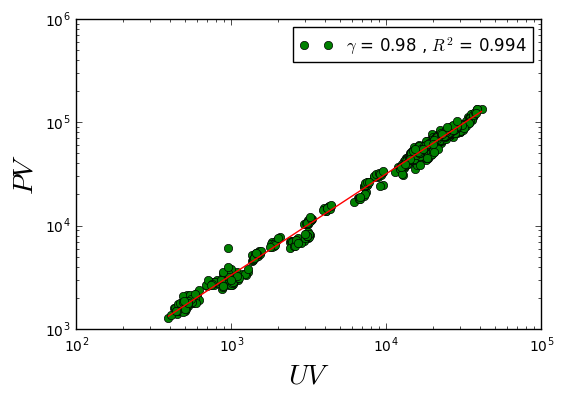

In [149]:
alloRegressPlot(uv,pv,'g','o','$UV$','$PV$', True)

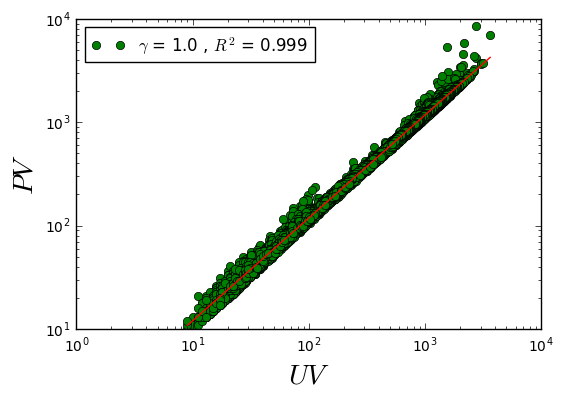

In [140]:
alloRegressPlot(uv,pv,'g','o','$UV$','$PV$', True)

In [150]:
len(taobao)

32373278

In [80]:
from collections import defaultdict

t=defaultdict(list)
for i in taobao[:10000]:
    line=i.strip().split(',')    
    t[line[0]].append(np.array(line[1:]).astype('int'))

# Dissipation Law

In [ ]:
'''
get the constant coefficient and scaling exponnet of di vs ti from zipped files containing 1000 daily flow networks

'''

def calculateGamma(data): 
    dt = defaultdict(lambda:[0,0])# key:thread; value:[di, ti]
    for From,To in data:
        dt[From][1]+=1
        if To == 's':
            dt[From][0]+=1
    di,ti=np.array([i for i in dt.values() if i[0]>0 and i[1]>0]).T
    b, gamma, r = OLSRegressFit(np.log(ti),np.log(di))
    return b, gamma, r



        
D=defaultdict(lambda:[])
D[k].append(calculateGamma(data))

f = z.read(k).split('\n')
flushprint(str(num)+'__'+str(z.namelist().index(k)))
Hour = ''

data = []
for line in f:
    line = line.strip().split('\t')
    hour, From, To = line
    if hour == Hour:
        data.append([From,To])
    else:   
        if Hour:   
            D[k].append(calculateGamma(data))
        Hour = hour
        data = []

In [57]:
taobao[:10]

['0,71817,50385\r\n',
 '0,131325,427241\r\n',
 '0,138572,14017\r\n',
 '0,249651,8104\r\n',
 '0,257402,46992\r\n',
 '0,279238,15365\r\n',
 '0,338032,17507\r\n',
 '0,347650,12369\r\n',
 '0,386064,285460\r\n',
 '0,18765,20304\r\n']